# Event Data Visualization in Football: Different convex hull Styles


In [1]:
import pandas as pd  # Importing pandas for data manipulation
from mplsoccer import Sbopen, VerticalPitch  # Importing mplsoccer for football pitch visualization and data parsing
import numpy as np  # Importing NumPy for numerical operations
from scipy.spatial import ConvexHull  # Importing ConvexHull to compute the convex hull of a set of points

# Initializing the StatsBomb data parser
parser = Sbopen()
# Loading event data for a specific match (ID: 3895158)
df = parser.event(3895158)[0]
# Filtering data to include only events involving Edmond Fayçal Tapsoba
data = df[df['player_name'] == 'Edmond Fayçal Tapsoba']

###  Cartoon Style 🎨

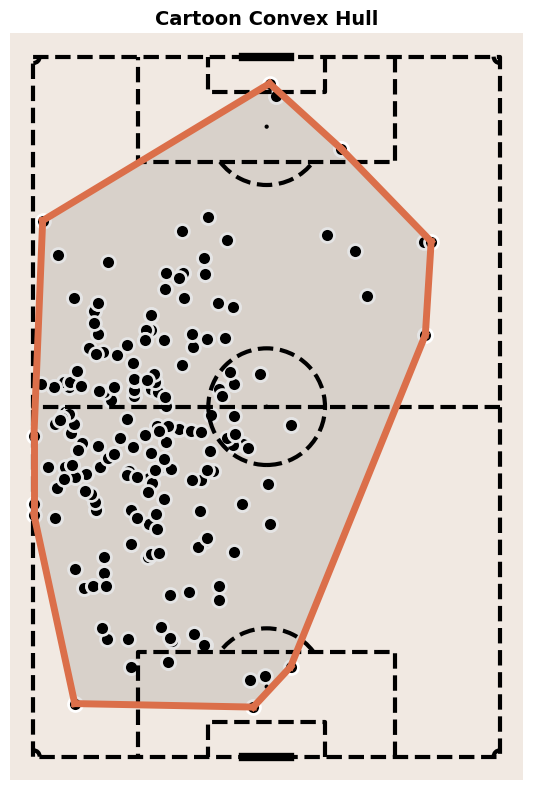

In [86]:

# Setting pitch background color
back = '#F1E9E2'
# Creating a vertical pitch with custom styling
p = VerticalPitch(line_color="black", pitch_color=back, linestyle='--', linewidth=3, 
                  goal_linestyle='-', line_zorder=2, corner_arcs=True)

# Creating a figure and axis for the pitch
fig, ax = p.draw(figsize=(12,8))
ax.set_facecolor(back)  # Setting the background for the figure

# Plotting player's event locations as scatter points
p.scatter(data.x, data.y, color='black', s=100, edgecolors='white', linewidth=2, ax=ax)

# Creating an array of (x, y) coordinates for convex hull calculation
points = np.column_stack((data.x, data.y))

# Calculating the convex hull using mplsoccer's built-in function
hull1 = p.convexhull(data.x, data.y)
# Computing the convex hull using SciPy's ConvexHull
hull = ConvexHull(points)

# Drawing the convex hull edges on the pitch
for simplex in hull.simplices:
    p.plot(data.x.iloc[simplex], data.y.iloc[simplex], color='#DB6F4A', 
           linewidth=5, linestyle="solid", ax=ax)

# Filling the convex hull area with a translucent overlay
polygon = p.polygon(hull1, color="black", alpha=0.1, ax=ax)

# Adding a title to the plot
ax.set_title("Cartoon Convex Hull", fontsize=14, fontweight='bold')

# Saving the figure as a high-resolution PNG image
plt.savefig("Cartoon Convex Hull.png", dpi=300, bbox_inches='tight')


###  Futuristic Neon Style 🔵

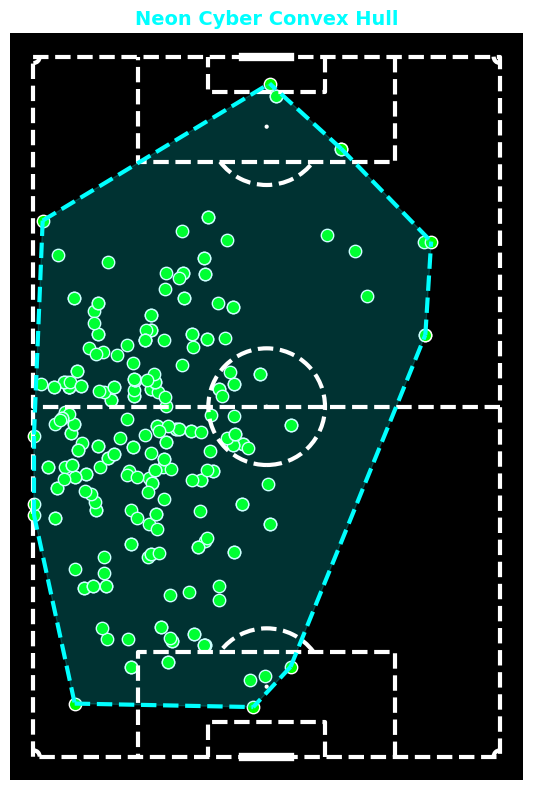

In [89]:
back = 'black'  # Sets the background color to black

# Creating a vertical pitch with custom styling
p = VerticalPitch(line_color="w", pitch_color=back, linestyle='--', linewidth=3, 
                  goal_linestyle='-', line_zorder=2, corner_arcs=True)

# Creating a figure and axis for the pitch
fig, ax = p.draw(figsize=(12, 8))

# Set the axes background color to match the pitch
ax.set_facecolor(back)  # Dark background

# Plotting player's event locations as scatter points
p.scatter(data.x, data.y, color='#00FF00', s=80, edgecolors='#FFFFFF', linewidth=1, ax=ax)

# Creating an array of (x, y) coordinates for convex hull calculation
points = np.column_stack((data.x, data.y))

# Calculate the convex hull of the data points
hull1 = p.convexhull(data.x, data.y)
hull = ConvexHull(points)

# Plot the edges of the convex hull
for simplex in hull.simplices:
    p.plot(data.x.iloc[simplex], data.y.iloc[simplex], color='#00FFFF', linewidth=3, linestyle='dashed', ax=ax)

# Create a polygon from the convex hull with a semi-transparent fill
polygon = p.polygon(hull1, color='#00FFFF', alpha=0.2, ax=ax)

# Set the title of the plot with styling
ax.set_title("Neon Cyber Convex Hull", fontsize=14, fontweight='bold', color='cyan')

# Save the figure as a PNG file with high resolution
plt.savefig("Neon Cyber Convex Hull.png", dpi=300, bbox_inches='tight')

### Gradient Fill Style 🌈

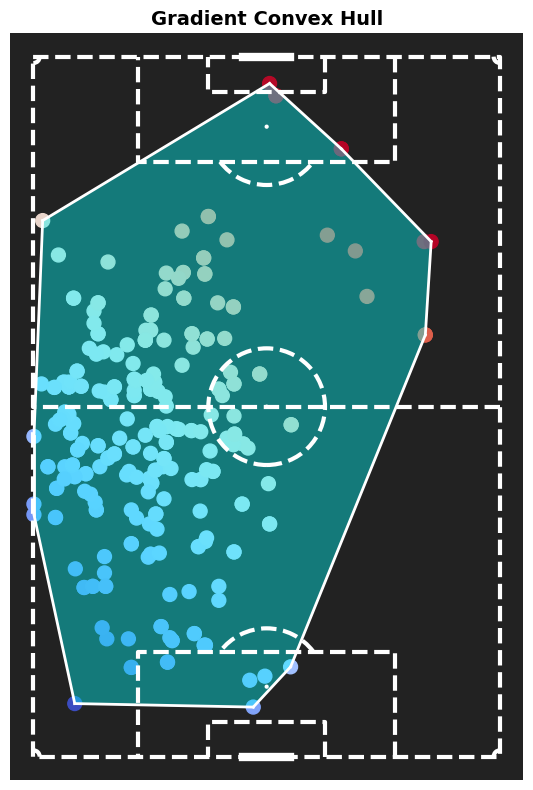

In [88]:
back = '#222'  # Sets the background color 

# Create a VerticalPitch  with specified line and pitch colors, styles, and widths
p = VerticalPitch(line_color="w", pitch_color=back, linestyle='--', linewidth=3, 
                  goal_linestyle='-', line_zorder=2, corner_arcs=True)

# Draw the pitch and create a figure and axes
fig, ax = p.draw(figsize=(12, 8))

# Set the axes background color to match the pitch
ax.set_facecolor(back)  # Dark background

# Scatter plot for the data points with a color map based on the sum of x and y
p.scatter(data.x, data.y, c=data.x + data.y, cmap='coolwarm', s=100, ax=ax)

# Stack x and y coordinates into a single array for convex hull calculation
points = np.column_stack((data.x, data.y))

# Calculate the convex hull of the data points
hull1 = p.convexhull(data.x, data.y)
hull = ConvexHull(points)

# Plot the edges of the convex hull in white
for simplex in hull.simplices:
    p.plot(data.x.iloc[simplex], data.y.iloc[simplex], color='w', linewidth=2, ax=ax)

# Create a polygon from the convex hull with a semi-transparent cyan fill
polygon = p.polygon(hull1, color='cyan', alpha=0.4, ax=ax)

# Set the title of the plot with styling
ax.set_title("Gradient Convex Hull", fontsize=14, fontweight='bold', color='black')

# Save the figure as a PNG file with high resolution
plt.savefig("Gradient Convex Hull.png", dpi=300, bbox_inches='tight')